## Предсказание бинарных результатов
#### Решение основано на методе линейной регрессии 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import f1_score

Собираем данные из файла "train.csv"

In [19]:
X = []
Y = []
i = 1
with open('train.csv') as file:
    line = file.readline()
    while line and i < 6964:
        line = file.readline().split(',')
        for index, element in enumerate(line):
            line[index] = float(element)
        x_line = line[:-1]
        target = line[-1]

        X.append(x_line)
        Y.append(target)
        i+= 1

Переводим списки в матрицы при помощи numpy и считаем матрицу коэффициентов W

In [20]:
X = np.array([np.array(i) for i in X], dtype=np.dtype(float))  
Y = np.array(Y, dtype=np.dtype(int))

In [21]:
n = int(Y.shape[0])
Y = np.array(Y).reshape(n, 1)
X_T = np.transpose(X)
W = (np.linalg.inv(X_T.dot(X)).dot(X_T)).dot(Y)

Анализируем способ перевода в бинарные значения

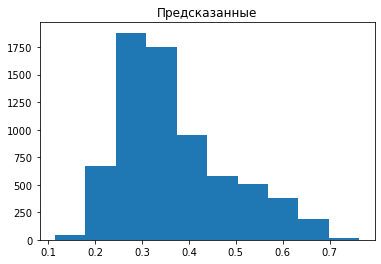

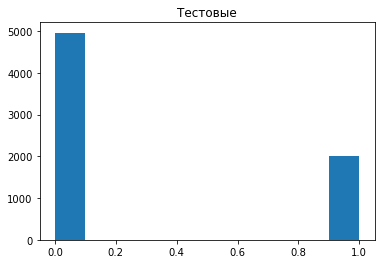

In [51]:
Y_predicted = X.dot(W)
plt.hist(Y_predicted)
plt.title('Предсказанные')
plt.show()

plt.hist(Y)
plt.title('Тестовые')
plt.show()

Пробуем очевидное решение и смотртим на метрику f1_score

In [48]:
Y_bin = []
change_value = 0.5
for value in Y_predicted:
    if value[0] > change_value:
        Y_bin.append(1)
    else:
        Y_bin.append(0)


In [49]:
res = f1_score(Y, Y_bin)
print(res) 

0.7167147898620468


Пробуем делать лучше и подобрать правильное число change_value, для определения бинарного значения

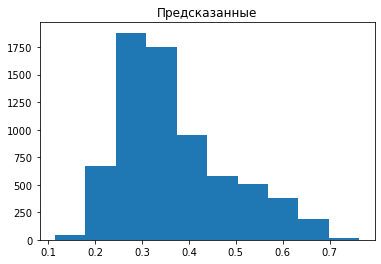

In [45]:
Y_predicted = X.dot(W)
plt.hist(Y_predicted)
plt.title('Предсказанные')
plt.show()


# Посчитать сколько чисел принимает значение 1 в Y это n и посмтреть до какого значения в Y_predicted дойти чтобы набрать n значений

In [18]:
y_len = len(Y)
zeros = 0
for i in Y:
    if i[0] == 0:
        zeros += 1
print(zeros*100/y_len)

71.27674852793336


In [19]:
print(len(Y_my))

6963


In [20]:
y_test = sorted(Y_my.tolist())
zeros_p = 0
for i in y_test:
    if i[0] < 0.40732:
        zeros_p += 1
print(zeros_p)

4962


In [21]:
data = []

In [22]:
for i in Y_my:
    if i < 0.40678:
        numb = 0
    else:
        numb = 1
    data.append(numb)

In [23]:
res = 0

In [24]:
for index, d in enumerate(data):
    if d == Y[index]:
        res += 1


In [25]:
m_res = len(Y)

In [26]:
print(m_res, res, res*100/m_res)

6963 6539 93.91067068792188


In [ ]:
Y_predicted = X.dot(W)
a = f1_score(Y, Y_predicted)
print(a)

Используем рассчитанные коэффициенты для предсказания private данных

In [52]:
X_new = []
i = 1
with open("test.csv") as file:
    line = file.readline()
    while i < 3921:
        line = file.readline().split(',')
        for index, element in enumerate(line):
            line[index] = float(element)
        X_new.append(line)
        i += 1
X_new = np.array([np.array(i) for i in X_new], dtype=np.dtype(float))

In [53]:
Y_trained = X_new.dot(W)

In [54]:
data_out = []
for i in Y_trained:
    if i > change_value:
        numb = 1
    else:
        numb = 0
    data_out.append(numb)

In [57]:
data_to_csv = 'target\n'
for value in data_out:
    line = f'{value}\n'
    data_to_csv += line
    
with open ("predicted.csv", 'w') as file:
    file.writelines(data_to_csv)
